In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
laptop = pd.read_csv('data/laptop_price.csv', encoding= 'latin-1')

In [11]:
laptop = laptop.drop(columns= 'laptop_ID')

In [12]:
laptop.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [13]:
laptop['Weight'] = laptop['Weight'].str.split('k').str[0].astype(float)

In [14]:
laptop['Ram'] = laptop['Ram'].str.split('G').str[0].astype(float)

In [15]:
laptop['Memory'] = laptop['Memory'].str.replace('T','024G').str.split('G').str[0].astype(float)

In [16]:
laptop['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [17]:
laptop['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [18]:
laptop['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [19]:
laptop['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [20]:
# 노트북이 가벼운 순으로 정렬
laptop.sort_values('Weight', ascending= True)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1082,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,646.27
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,319.00
1126,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,479.00
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,549.00
746,Samsung,Notebook 9,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16.0,256.0,Intel HD Graphics 620,Windows 10,0.81,1649.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16.0,256.0,Nvidia GeForce GTX 980M,Windows 10,4.60,2749.99
1081,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32.0,512.0,Nvidia GeForce GTX 980M,Windows 10,4.60,3240.00
577,Lenovo,IdeaPad Y910-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32.0,256.0,Nvidia GeForce GTX 1070,Windows 10,4.60,2663.00
1048,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16.0,128.0,Nvidia GeForce GTX 980M,Windows 10,4.60,2289.99


In [21]:
laptop.groupby('Company')['Weight'].mean().sort_values(ascending= True).to_frame()

,Weight
Company,
LG,1.050000
Huawei,1.050000
Google,1.100000
Microsoft,1.251333
Samsung,1.315556
Apple,1.320476
Vero,1.330000
Mediacom,1.337143
Xiaomi,1.620000


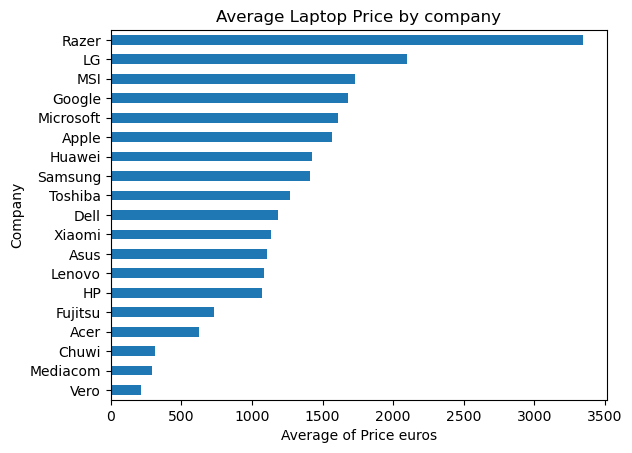

In [22]:
# 노트북 평균 값을 바차트로 나타냄
laptop.groupby('Company')['Price_euros'].mean().sort_values().plot(kind= 'barh')
plt.title('Average Laptop Price by company')
plt.xlabel('Average of Price euros')
plt.show()

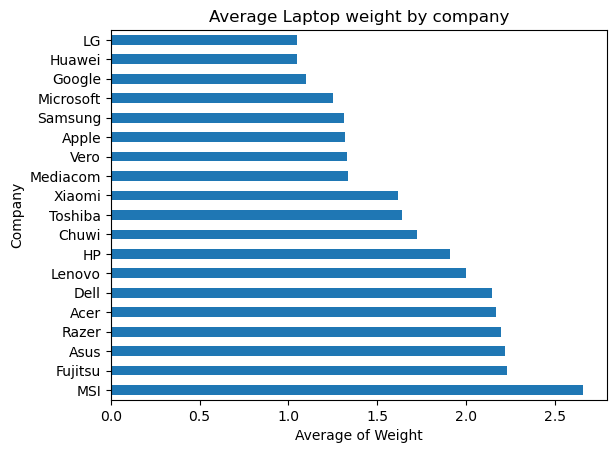

In [23]:
# 회사별 노트북 평균 무게를 바차트로 나타냄
laptop.groupby('Company')['Weight'].mean().sort_values(ascending= False).plot(kind= 'barh')
plt.title('Average Laptop weight by company')
plt.xlabel('Average of Weight')
plt.show()

In [24]:
laptop[['Weight', 'Price_euros']].describe()

,Weight,Price_euros
count,1303.000000,1303.000000
mean,2.038734,1123.686992
std,0.665475,699.009043
min,0.690000,174.000000
25%,1.500000,599.000000
50%,2.040000,977.000000
75%,2.300000,1487.880000
max,4.700000,6099.000000


In [25]:
# 가장 비싼 컴퓨터?
laptop[laptop['Price_euros'] == laptop['Price_euros'].max()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32.0,1024.0,Nvidia GeForce GTX 1080,Windows 10,3.49,6099.0


In [26]:
# 가장 저렴한 컴퓨터
laptop[laptop['Price_euros'] == laptop['Price_euros'].min()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,2.0,32.0,Intel HD Graphics,Chrome OS,1.3,174.0


In [27]:
# 가장 무게가 가벼운 컴퓨터
laptop[laptop['Weight'] == laptop['Weight'].min()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
50,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,319.00
1082,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,646.27
1114,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Android,0.69,549.00
1126,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4.0,64.0,Intel HD Graphics 400,Windows 10,0.69,479.00


In [28]:
# 가장 무게가 무거운 컴퓨터
laptop[laptop['Weight'] == laptop['Weight'].max()]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
238,Asus,ROG G703VI-E5062T,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32.0,512.0,Nvidia GeForce GTX 1080,Windows 10,4.7,3890.0


In [29]:
laptop[['Inches', 'Ram','Weight','Inches','Price_euros']].corr()

,Inches,Ram,Weight,Inches,Price_euros
Inches,1.000000,0.237993,0.827631,1.000000,0.068197
Ram,0.237993,1.000000,0.383874,0.237993,0.743007
Weight,0.827631,0.383874,1.000000,0.827631,0.210370
Inches,1.000000,0.237993,0.827631,1.000000,0.068197
Price_euros,0.068197,0.743007,0.210370,0.068197,1.000000


In [30]:
data = laptop.groupby('Inches')['Price_euros'].mean().to_frame().reset_index()

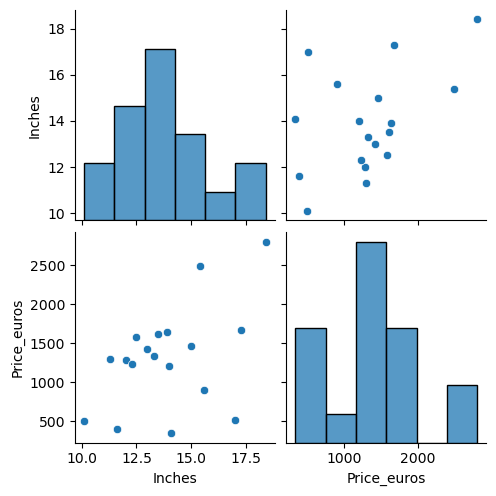

In [31]:
import seaborn as sb
sb.pairplot(data, vars=['Inches', 'Price_euros'])
plt.show()

In [32]:
laptop['Ram'].sort_values(ascending= True).unique()

array([ 2.,  4.,  6.,  8., 12., 16., 24., 32., 64.])

In [33]:
laptop['Ram'].unique()

array([ 8., 16.,  4.,  2., 12.,  6., 32., 24., 64.])

In [34]:
X = laptop[['TypeName','Inches','Cpu','Ram','Memory','Weight']]

In [35]:
y=laptop['Price_euros']

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0,2])], remainder= 'passthrough')

In [38]:
X = ct.fit_transform(X)

In [39]:
X

<1303x128 sparse matrix of type '<class 'numpy.float64'>'
	with 7818 stored elements in Compressed Sparse Row format>

In [40]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [41]:
# 인공지능에 학습
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [42]:

from sklearn.linear_model import LinearRegression

In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = regressor.predict(X_test)

In [45]:
y_test 

644      450.00
1275     729.00
163     1079.00
1008    1049.26
909     1899.00
         ...   
1112     429.00
893     1799.00
493      579.00
1245    1600.00
62       599.00
Name: Price_euros, Length: 261, dtype: float64

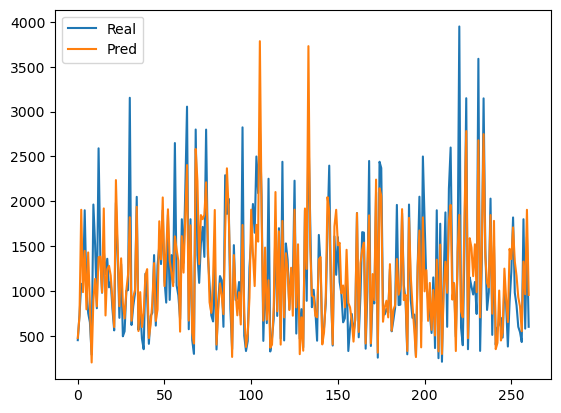

In [46]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Real','Pred'])
plt.savefig
plt.show()

In [47]:
# 새로운 데이터 
# 'TypeName' = Ultrabook,
# 'Inches'= 15.3,
# 'Cpu' : Intel Core i5 2.3GHz	
# 'Ram': 32 ,
# 'Memory':128,
# 'Weight' : 2.5

In [48]:
import numpy as np

In [49]:
new_data = np.array(['Ultrabook',15.3,'Intel Core i5 2.3GHz' ,32, 128, 2.5])

In [50]:
new_data.shape

(6,)

In [51]:
new_data = new_data.reshape(1,6)

In [52]:
new_data = ct.transform(new_data)

c:\Users\5-12\Anaconda3\envs\YH\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\5-12\Anaconda3\envs\YH\lib\site-packages\sklearn\compose\_column_transformer.py:779: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  check_array(X, accept_sparse=True, force_all_finite=False)


In [53]:
new_data_pred = regressor.predict(new_data)

In [54]:
new_data_pred[0]

2764.755100580803

In [55]:
#import joblib
#joblib.dump(regressor, 'regressor.pkl')
#joblib.dump(ct, 'ct.pkl')

In [56]:
# laptop.to_csv('float_laptop.csv')